# HR Analytics Employee Attrition Prediction - [IBM Dataset on Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset "IBM HR Analytics Employee Attrition & Performance")


### **Problem Statement**

Employee attrition poses a significant challenge for businesses. High turnover rates lead to increased recruitment costs, lost productivity, and disruption to team dynamics. This project aims to predict employee attrition using machine learning, enabling organizations to proactively address factors contributing to turnover and improve employee retention.

---

### **Importance**

1. **Quantifiable Business Impact**:
   - Employee attrition costs organizations between **33% and 200% of an employee's annual salary** (depending on role and seniority).
   - For large organizations like IBM or Intel, even a **1% reduction in attrition** can save millions annually.

2. **Improved Workforce Planning**:
   - Early identification of employees at risk of leaving enables HR to implement targeted retention strategies, reducing disruptions to operations.

3. **Enhanced Employee Satisfaction**:
   - Understanding key drivers of attrition helps create better work environments, improving overall morale and engagement.

---



### **Key Stakeholders**

1. **Human Resources (HR)**:
   - HR teams can use predictions to identify at-risk employees and develop tailored retention plans (e.g., increasing job satisfaction, adjusting workloads).

2. **Leadership/Management**:
   - Managers benefit from insights into team dynamics and can address factors leading to attrition proactively.

3. **Finance Team**:
   - Cost savings from reduced attrition directly impact the bottom line, aligning with budget optimization goals.

4. **Employees**:
   - Identifying and mitigating attrition factors enhances job satisfaction, work-life balance, and career growth opportunities.
---


### Data Overview

#### Demographic Information:
1. Age: Employee's age (int)
2. Gender: Employee's gender (object)
3. MaritalStatus: Employee's marital status (object)
4. DistanceFromHome: Distance from work to home (int)

#### Employment Details:
5. EmployeeNumber: Unique identifier for each employee (int)
6. EmployeeCount: Number of employees (constant value of 1 in this dataset) (int)
7. Department: Employee's department (object)
8. JobRole: Employee's specific role in the company (object)
9. JobLevel: Level of job (hierarchy in the organization) (int)
10. YearsAtCompany: Number of years at the company (int)
11. YearsInCurrentRole: Number of years in current role (int)
12. YearsSinceLastPromotion: Years since last promotion (int)
13. YearsWithCurrManager: Years working under current manager (int)
14. TotalWorkingYears: Total years of working experience (int)
15. NumCompaniesWorked: Number of companies worked for (int)

#### Education and Training:
16. Education: Level of education (int)
17. EducationField: Field of education (object)
18. TrainingTimesLastYear: Number of training sessions attended last year (int)

#### Compensation and Benefits:
19. DailyRate: Daily rate of pay (int)
20. HourlyRate: Hourly rate of pay (int)
21. MonthlyIncome: Monthly salary (int)
22. MonthlyRate: Monthly rate (int)
23. PercentSalaryHike: Percentage increase in salary (int)
24. StockOptionLevel: Level of stock options (int)
25. OverTime: Whether the employee works overtime (object)

#### Job Satisfaction and Work-Life Balance:
26. JobSatisfaction: Level of job satisfaction (int)
27. EnvironmentSatisfaction: Satisfaction with work environment (int)
28. RelationshipSatisfaction: Satisfaction with work relationships (int)
29. WorkLifeBalance: Perceived work-life balance (int)
30. JobInvolvement: Level of involvement in job (int)

#### Performance and Travel:
31. PerformanceRating: Employee's performance rating (int)
32. BusinessTravel: Frequency of business travel (object)

#### Standard Information:
33. Over18: Whether the employee is over 18 (constant 'Y' in this dataset) (object)
34. StandardHours: Standard working hours (constant 80 in this dataset) (int)

#### Target Variable:
35. Attrition: Whether the employee has left the company (Yes/No) (object)

This dataset contains various features related to employee characteristics, job details, compensation, satisfaction levels, and performance, which can be used to predict employee attrition.


##2. Exploratory Data Analysis (EDA)

Import required libraries

In [ ]:
#import
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Upload data file

In [ ]:
# Open file dialog to upload CSV file
from google.colab import files
uploaded = files.upload()

# Load data
data = pd.read_csv(list(uploaded.keys())[0])

Saving HR-Employee-Attrition-train-dataset.csv to HR-Employee-Attrition-train-dataset (1).csv


Quick data review

In [ ]:
# first five columns

print("\n First five columns\n")
data.head()



 First five columns



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


list cloumns for quick review as needed

In [ ]:
# Data columns

print("\n Data columns\n", data.columns.to_list())


 Data columns
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


overview of datatypes

In [ ]:
# info

print("\n Info\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

inspect stats for any potential outliers and overall distribution

In [ ]:
# Summary Statistics

print("\n Summary statistics\n", data.describe())

# shape
print("\n Shape\n", data.shape)


 Summary statistics
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

look for misssing data

In [ ]:
# Checking for & Handling missing values

data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


###Duplicate Data

In [ ]:
print("\n Total Duplicate values:", data.duplicated().sum())

# drop if any duplicates
data.drop_duplicates(inplace=True)


 Total Duplicate values: 0


###Explore Data Diversity

unique values per column

In [ ]:
data.nunique().to_frame('Unique Values')

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


#### Observations
- The data has 29 features and 1470 rows.
- The data is complete with no nul vualues.
- Each record has a unique employee id
- There are no duplicate records in the data.
- The columns data types are int, float, and object.

Visual of attrition rate

<ipython-input-13-41164cff3670>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Attrition', palette='coolwarm')


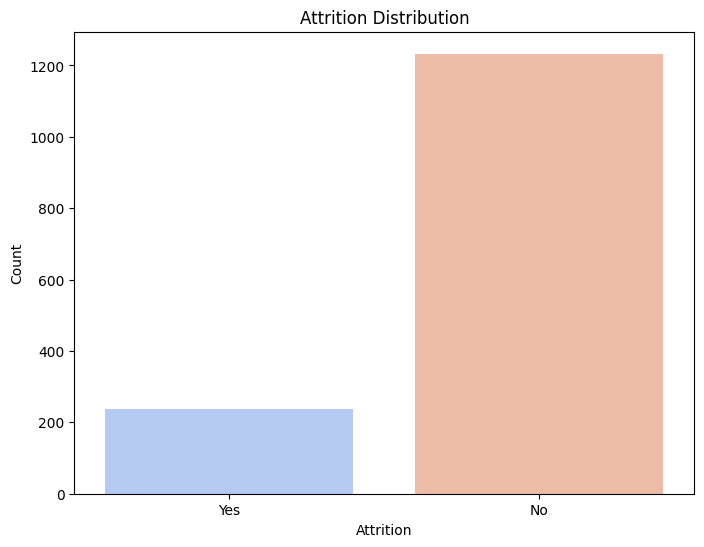

In [ ]:
# Plot attrition distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Attrition', palette='coolwarm')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()



##### **Attrition Distribution Explanation**

The graph shows a highly imbalanced distribution of employee attrition, where the majority of employees, approximately 85%, have not left the organization (labeled as "No"), while only about 15% have left (labeled as "Yes"). This indicates that attrition is relatively low within the company, which may simplify prediction models but also highlights the need to address the specific factors leading to attrition among the minority group.


#### **Attrition by Job Role**

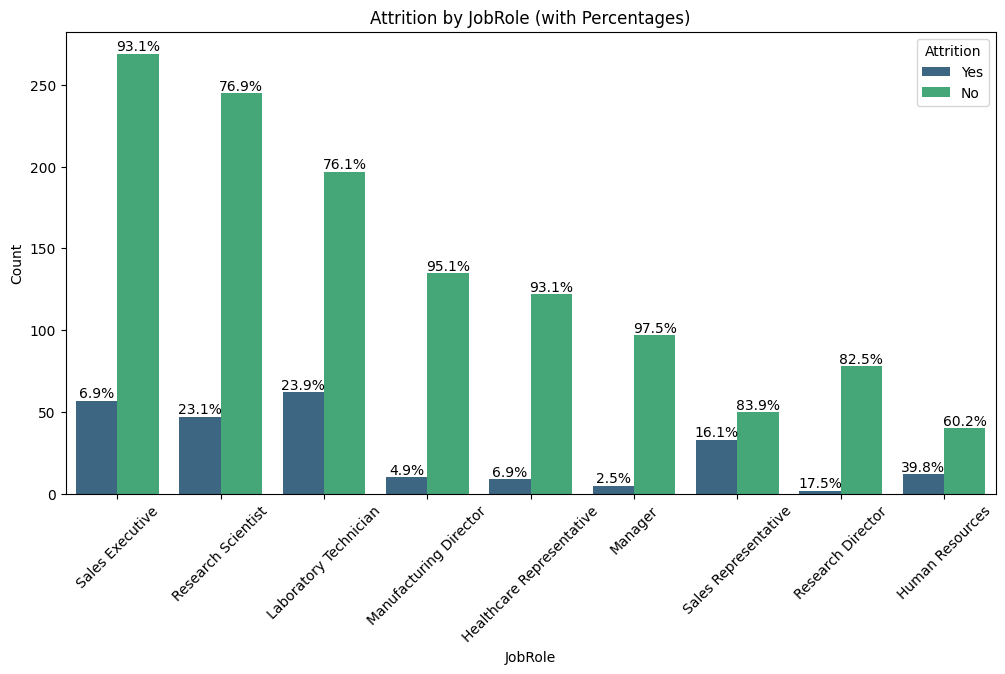

In [ ]:
# Calculate counts and percentages by EducationField and Attrition
grouped = data.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')
grouped['Percent'] = grouped.groupby('JobRole')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='JobRole', hue='Attrition', palette='viridis')

# Annotate bars with correct percentages
for container, attrition in zip(ax.containers, ['Yes', 'No']):  # Match bar containers to Attrition values
    for bar, (_, row) in zip(container, grouped[grouped['Attrition'] == attrition].iterrows()):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            bar.get_height(),  # Height of the bar
            f'{row["Percent"]:.1f}%',  # Percentage value
            ha='center', va='bottom', fontsize=10  # Alignment and font size
        )

# Customize the plot
plt.title('Attrition by JobRole (with Percentages)')
plt.xlabel('JobRole')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()



The graph shows the percentage distribution of employee attrition (Yes/No) across various job roles.

#### **Key Observations:**
1. **Sales Executive** and **Research Scientist** roles have relatively higher attrition rates at **6.9%** and **23.1%**, respectively.
2. **Laboratory Technicians** experience significant attrition at **23.9%**, indicating a potential retention issue in this role.
3. **Healthcare Representatives** and **Managers** show minimal attrition rates at **4.9%** and **2.5%**, respectively, suggesting these roles have better retention.
4. **Sales Representatives** have an attrition rate of **16.1%**, while **Research Directors** show **17.5%**, highlighting moderate levels of turnover.
5. **Human Resources** stands out with **39.8% attrition**, the highest among all job roles.

#### **Conclusion:**
The graph provides insights into which job roles are more prone to attrition, helping the organization to target retention efforts where needed most, such as in **Human Resources** and **Laboratory Technicians**.


#### **Attrition by Years at Company**

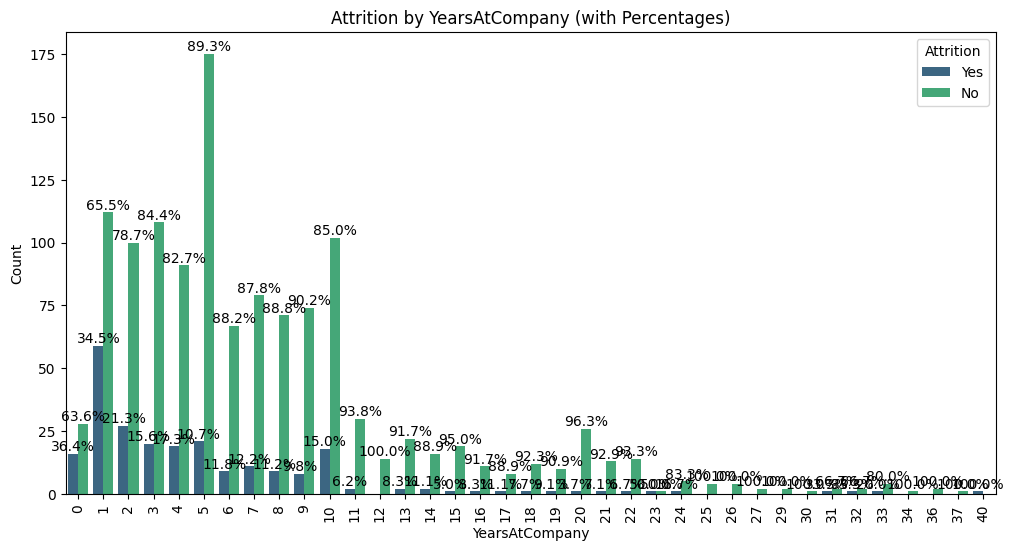

In [ ]:
# YearsAtCompany

# Calculate counts and percentages by EducationField and Attrition
grouped = data.groupby(['YearsAtCompany', 'Attrition']).size().reset_index(name='Count')
grouped['Percent'] = grouped.groupby('YearsAtCompany')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='YearsAtCompany', hue='Attrition', palette='viridis')

# Annotate bars with correct percentages
for container, attrition in zip(ax.containers, ['Yes', 'No']):  # Match bar containers to Attrition values
    for bar, (_, row) in zip(container, grouped[grouped['Attrition'] == attrition].iterrows()):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            bar.get_height(),  # Height of the bar
            f'{row["Percent"]:.1f}%',  # Percentage value
            ha='center', va='bottom', fontsize=10  # Alignment and font size
        )

# Customize the plot
plt.title('Attrition by YearsAtCompany (with Percentages)')
plt.xlabel('YearsAtCompany')
plt.ylabel('Count')
plt.xticks(rotation=-270)
plt.legend(title='Attrition', loc='upper right')
plt.show()



The graph displays the distribution of employee attrition based on their years at the company, highlighting both counts and percentages.

#### **Key Observations:**
1. **High Attrition in Early Years:**
   - Attrition is highest during the first year of employment, with **34.5%** of employees leaving.
   - Attrition rates gradually decrease as tenure increases, dropping to **11.8%** by year 5.

2. **Low Attrition in Later Years:**
   - Employees with over 10 years at the company show very low attrition rates, with some years (e.g., 12, 15, 16) experiencing **0% attrition**.

3. **Retention Trends:**
   - Employees tend to stay with the company longer once they surpass the initial 3–5 years, as seen with increasing "No" percentages (e.g., **89.3%** at year 2, **96.3%** at year 20).

#### **Conclusion:**
The graph highlights a retention challenge during the early years of employment, suggesting the need for improved onboarding and early-career engagement strategies to reduce initial attrition.


#### **Monthly Income vs. Attrition**

<ipython-input-16-befa21a98f7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', palette='Set3')


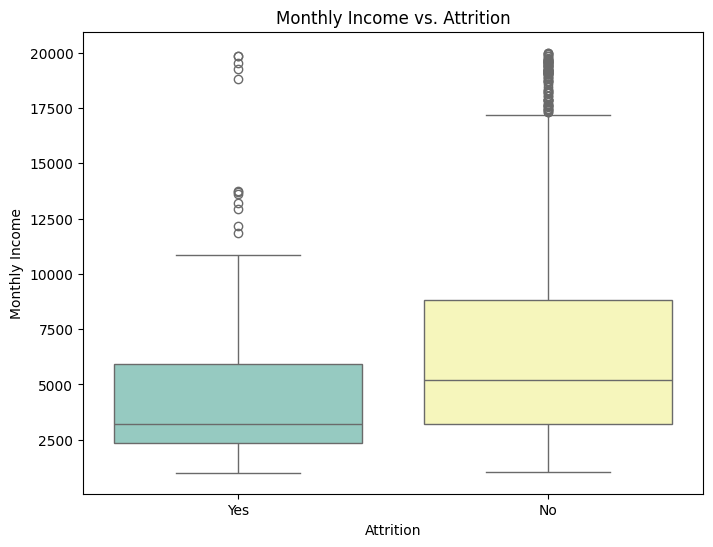

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title('Monthly Income vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()



The box plots show that employees who did not leave ("No") generally have higher monthly incomes compared to those who left ("Yes"). The median income is notably lower for those who left, and there are more outliers (high-income earners) among employees who stayed. This suggests a possible correlation between higher income and better retention.


#### **Distance From Home vs. Attrition**

<ipython-input-17-d3168c7d5c6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='DistanceFromHome', palette='coolwarm')


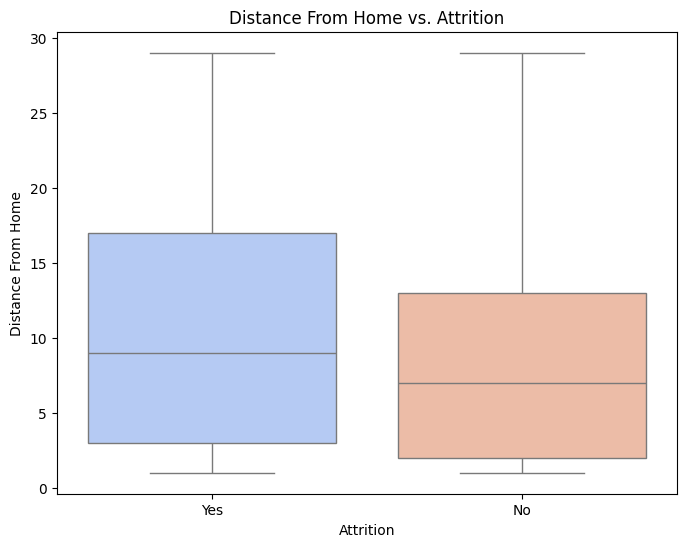

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='DistanceFromHome', palette='coolwarm')
plt.title('Distance From Home vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance From Home')
plt.show()



The box plots show that employees who left ("Yes") generally live farther from work compared to those who stayed ("No"). The median distance for attrition cases is higher, suggesting that longer commutes might contribute to higher attrition rates. However, there is overlap, indicating that other factors likely influence attrition as well.


#### **Job Satisfaction vs. Attrition**

<ipython-input-18-9dd1b468d1c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='JobSatisfaction', palette='Set2')


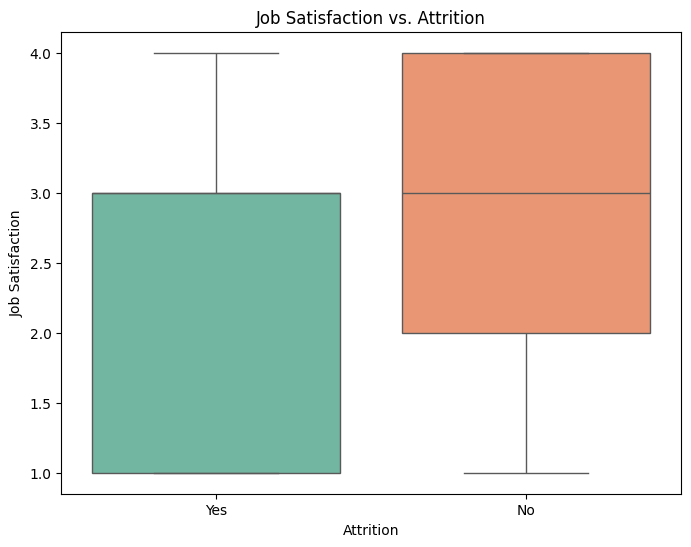

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='JobSatisfaction', palette='Set2')
plt.title('Job Satisfaction vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()



The box plots reveal that employees who stayed ("No") generally have higher job satisfaction levels, with a median value closer to 3.5. In contrast, employees who left ("Yes") have a lower median job satisfaction around 2.5. This suggests a strong correlation between lower job satisfaction and higher attrition rates, indicating that dissatisfaction might be a key driver of employee turnover.


#### **Attrition by Education Field**

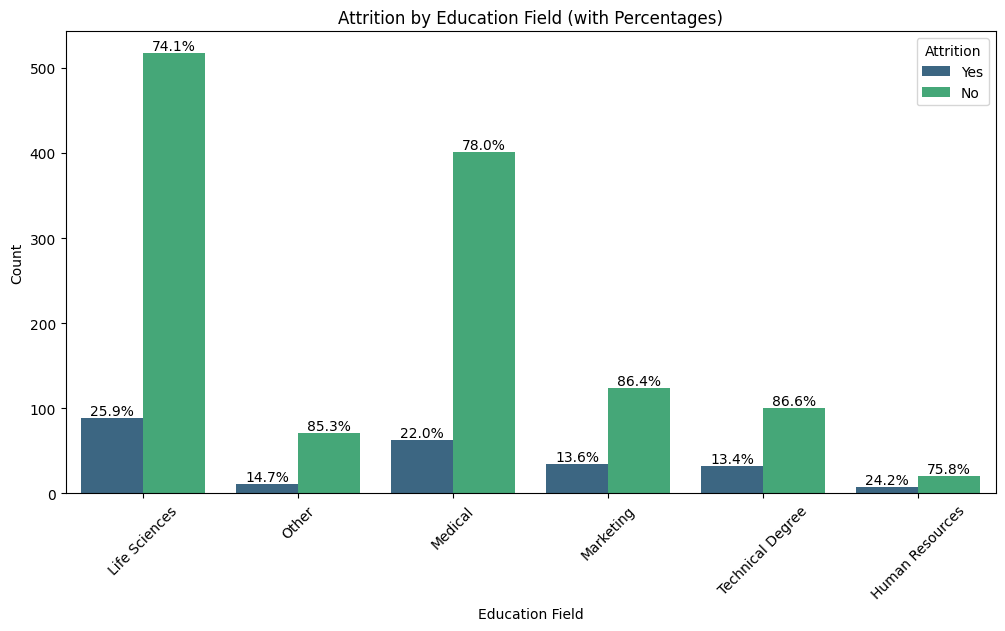

In [ ]:
# Calculate counts and percentages by EducationField and Attrition
grouped = data.groupby(['EducationField', 'Attrition']).size().reset_index(name='Count')
grouped['Percent'] = grouped.groupby('EducationField')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='EducationField', hue='Attrition', palette='viridis')

# Annotate bars with correct percentages
for container, attrition in zip(ax.containers, ['Yes', 'No']):  # Match bar containers to Attrition values
    for bar, (_, row) in zip(container, grouped[grouped['Attrition'] == attrition].iterrows()):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            bar.get_height(),  # Height of the bar
            f'{row["Percent"]:.1f}%',  # Percentage value
            ha='center', va='bottom', fontsize=10  # Alignment and font size
        )

# Customize the plot
plt.title('Attrition by Education Field (with Percentages)')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition', loc='upper right')
plt.show()




The bar chart shows the percentage distribution of employee attrition (Yes/No) across different education fields.

#### **Key Observations:**
1. **Highest Attrition:**
   - Employees in the **Life Sciences** field have a notable attrition rate of **25.9%**, despite forming a large proportion of the workforce.
   - **Human Resources** also shows significant attrition at **24.2%.**

2. **Lowest Attrition:**
   - Fields like **Marketing** and **Technical Degrees** have lower attrition rates of **13.6%** and **13.4%**, respectively.

3. **Retention Trends:**
   - **Medical** and **Other** fields exhibit moderate attrition rates at **22.0%** and **14.7%**, suggesting better retention than Life Sciences and HR but worse than Marketing or Technical roles.

#### **Conclusion:**
Attrition rates vary significantly across education fields, with higher turnover in Life Sciences and HR. This suggests targeted retention strategies may be needed for employees in these fields.


#### **Attrition by Gender**

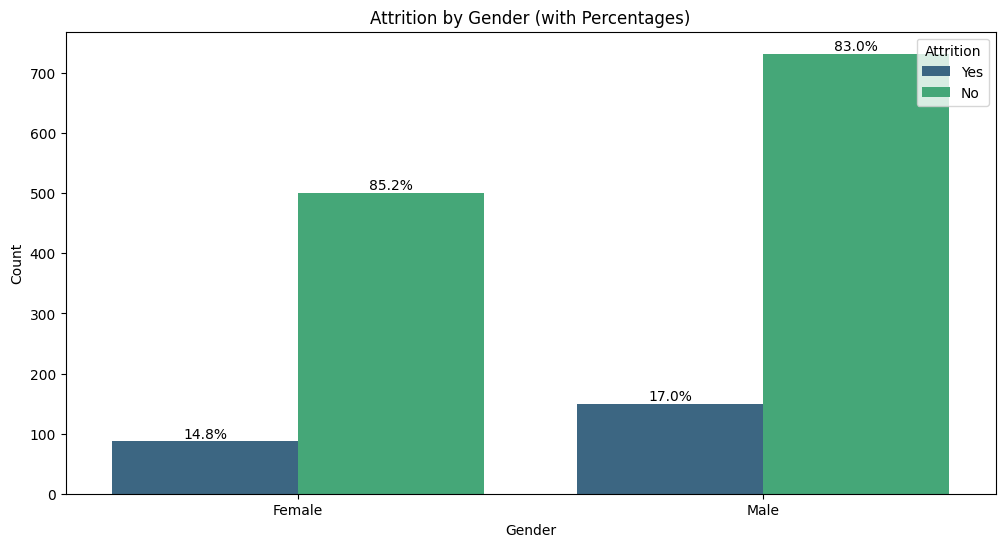

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate counts and percentages by Gender and Attrition
grouped = data.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')
grouped['Percent'] = grouped.groupby('Gender')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Create the countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='Gender', hue='Attrition', palette='viridis')

# Annotate bars with correct percentages
for container, attrition in zip(ax.containers, ['Yes', 'No']):  # Match bar containers to Attrition values
    for bar, (_, row) in zip(container, grouped[grouped['Attrition'] == attrition].iterrows()):
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            bar.get_height(),  # Height of the bar
            f'{row["Percent"]:.1f}%',  # Percentage value
            ha='center', va='bottom', fontsize=10  # Alignment and font size
        )

# Customize the plot
plt.title('Attrition by Gender (with Percentages)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Attrition', loc='upper right')
plt.show()




The bar chart displays the percentage of employee attrition (Yes/No) segmented by gender.

#### **Key Observations:**
1. **Attrition Rates:**
   - **Males:** Show a higher attrition rate of **17.0%** compared to females.
   - **Females:** Have a lower attrition rate of **14.8%**.

2. **Retention Trends:**
   - Both genders have strong retention rates, with **85.2%** of females and **83.0%** of males staying in the organization.

#### **Conclusion:**
The differences in attrition rates between genders are minimal, but males exhibit slightly higher turnover. This suggests gender may have a limited but measurable influence on attrition.


###Data Transformations


drop non-predictive variables

In [ ]:
# Drop non-predictive or redundant columns (we will also remove gender to avoid bias)
# data.drop(columns=['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount','Gender'], inplace=True)

features_to_drop = [
    'JobLevel',  # Highly correlated with MonthlyIncome
    'YearsInCurrentRole',  # Highly correlated with YearsWithCurrManager
    'DailyRate', 'HourlyRate', 'MonthlyRate',  # Weak correlation with churn
    'PercentSalaryHike', 'PerformanceRating',  # If weak correlation with churn
    'EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'
]

data.drop(columns=features_to_drop, inplace=True)

In [ ]:
# Convert Attrition to binary format
data['Attrition_Binary'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
#drop Attrition
data.drop(columns=['Attrition'], inplace=True)

In [ ]:
# Xavier - FEATURE ENGINEERING

# Tenure: Combine TotalWorkingYears, YearsInCurrentRole, and YearsWithCurrManager
data['Tenure'] = data['TotalWorkingYears'] + data['YearsWithCurrManager']

#  Income Ratio: Create MonthlyIncome/TotalWorkingYears (handling division by zero)
data['IncomeRatio'] = data['MonthlyIncome'] / (data['TotalWorkingYears'] + 1)

# BusinessTravel Intensity: Combine BusinessTravel features into binary
data['BusinessTravel_Intensity'] = data['BusinessTravel'].apply(
    lambda x: 1 if x == 'Travel_Frequently' else 0
)

# convert overtime
data['OverTime_binnary'] = data['OverTime'].apply(
    lambda x: 1 if x == 'Yes' else 0
)

# Simplify Job Roles: Group less frequent roles into broader categories
job_role_mapping = {
    'Sales Representative': 1,  #'Sales'
    'Research Scientist': 2, #'Research',
    'Laboratory Technician': 3, #'Technician',
    'Sales Executive': 1, #'Sales',
    'Manager': 4, #'Management',
    'Manufacturing Director': 4, #'Management',
    'Healthcare Representative': 5, #'Support',
    'Human Resources': 5, #'Support',
    'Research Director': 4, #'Management'
}
data['JobRole_Grouped'] = data['JobRole'].map(job_role_mapping)

# Drop original features after re-engineering
data.drop(columns=['TotalWorkingYears', 'YearsWithCurrManager', 'BusinessTravel', 'JobRole'], inplace=True)


In [ ]:
data.drop(columns=['OverTime','Gender'], inplace=True)


In [ ]:
# lets see our new columns

data.columns.tolist()

['Age',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'Attrition_Binary',
 'Tenure',
 'IncomeRatio',
 'BusinessTravel_Intensity',
 'OverTime_binnary',
 'JobRole_Grouped']

one hot encode categorical

In [ ]:
# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Department', 'MaritalStatus','EducationField'], drop_first=True)

scale numerical features

In [ ]:
# Identify numerical columns
numerical_features = data.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop('Attrition_Binary')
print("Numerical Columns:")
print(numerical_features)

Numerical Columns:
Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'Tenure', 'IncomeRatio',
       'BusinessTravel_Intensity', 'OverTime_binnary', 'JobRole_Grouped'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
# numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany',
#                       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Apply standard scaling
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])



last step - convert bool to int

In [ ]:
# Convert boolean columns to integers
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [ ]:
print("\n Info\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DistanceFromHome                   1470 non-null   float64
 2   Education                          1470 non-null   float64
 3   EnvironmentSatisfaction            1470 non-null   float64
 4   JobInvolvement                     1470 non-null   float64
 5   JobSatisfaction                    1470 non-null   float64
 6   MonthlyIncome                      1470 non-null   float64
 7   NumCompaniesWorked                 1470 non-null   float64
 8   RelationshipSatisfaction           1470 non-null   float64
 9   StockOptionLevel                   1470 non-null   float64
 10  TrainingTimesLastYear              1470 non-null   float64
 11  WorkLifeBalance                    1470 non-null   float

###Correlation Analysis

In [ ]:
def get_correlations_with_attrition(data, threshold=0.1):
    # Ensure 'Attrition_Binary' is numeric (0 for 'No', 1 for 'Yes')
    if data['Attrition_Binary'].dtype == 'object':
        data['Attrition_Binary'] = (data['Attrition_Binary'] == 'Yes').astype(int)

    # Compute correlations with Attrition_Binary
    correlations = data.corr()['Attrition_Binary'].sort_values(key=abs, ascending=False)

    # Filter correlations above the threshold (excluding Attrition_Binary itself)
    high_correlations = correlations[(abs(correlations) > threshold) & (correlations.index != 'Attrition_Binary')]

    return high_correlations

attrition_correlations = get_correlations_with_attrition(data, threshold=0.1)

# Print the results
print("Features correlated with Attrition_Binary (|correlation| > 0.1):")
for feature, correlation in attrition_correlations.items():
    print(f"{feature}: {correlation:.2f}")

Features correlated with Attrition_Binary (|correlation| > 0.1):
OverTime_binnary: 0.25
Tenure: -0.19
MaritalStatus_Single: 0.18
MonthlyIncome: -0.16
Age: -0.16
StockOptionLevel: -0.14
YearsAtCompany: -0.13
JobRole_Grouped: -0.13
JobInvolvement: -0.13
BusinessTravel_Intensity: 0.12
JobSatisfaction: -0.10
EnvironmentSatisfaction: -0.10


check for multicollinearity among highly correlated features

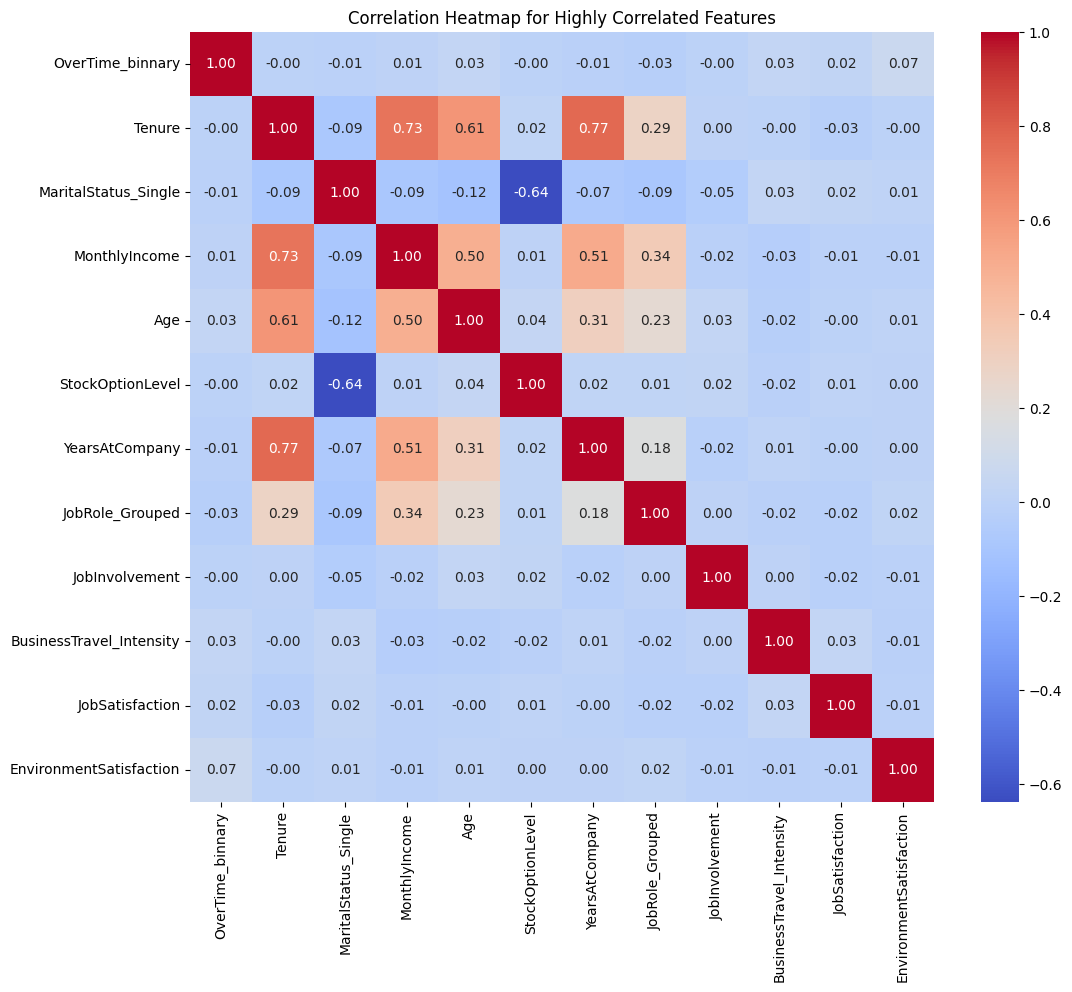

Highly correlated pairs (|correlation| > 0.8):


In [ ]:
# Subset the data to include only highly correlated features
correlated_features = attrition_correlations.index.tolist()  # Features from your correlation analysis
data_correlated = data[correlated_features]

# Compute the correlation matrix for highly correlated features
correlation_matrix = data_correlated.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap for Highly Correlated Features")
plt.show()

# Identify highly correlated pairs
threshold = 0.8
high_corr_pairs = [
    (col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold
]

# Print highly correlated pairs
print("Highly correlated pairs (|correlation| > 0.8):")
for pair in high_corr_pairs:
    print(pair[0], "<->", pair[1], f"Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f}")


There are no highly correlated pairs (> 0.8) with a high correlation to target variable

###Create Train/Test split

In [ ]:
# Split data
X = data.drop(columns=['Attrition_Binary'])
y = data['Attrition_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##3. Model Selection, Training and Evaluation

### Random Forest model

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294



The accuracy is great, but the target is so unbalanced the results are very poor on attrition = YES.  Our main concern.

####Hyper paramter tuning

Going to include pipeline and SMOTE as the target variable it extremely unbalanced.  Only ~13% of target has Attrition = 1 (Yes)

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define the pipeline with SMOTE and Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [100, 200, 300],         # Grid for number of trees
    'rf__max_depth': [None, 10, 20, 30],        # Grid for maximum depth of trees
    'rf__min_samples_split': [2, 5, 10],        # Grid for minimum samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4]           # Grid for minimum samples required at a leaf node
}

# Step 5: Perform GridSearchCV with Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(f"SKF: {skf}")
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2, scoring='recall')  # Focus on recall for minority class

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_


SKF: StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters:  {'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best cross-validation score:  0.4244871794871795


Best tuned model metrics

In [ ]:
# Predict on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for Class 1

# Evaluate the model
print("Confusion Matrix (Best Random Forest):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (Best Random Forest):")
print(classification_report(y_test, y_pred))

print("\nAUC-ROC (Best Random Forest):", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix (Best Random Forest):
[[243  12]
 [ 25  14]]

Classification Report (Best Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.54      0.36      0.43        39

    accuracy                           0.87       294
   macro avg       0.72      0.66      0.68       294
weighted avg       0.86      0.87      0.86       294


AUC-ROC (Best Random Forest): 0.7402714932126697


#### K-fold

In [ ]:
# Perform k-fold cross-validation on the best model
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean CV score: ", cv_scores.mean())

Cross-validation scores:  [0.8559322  0.85531915 0.85106383 0.8212766  0.85957447]
Mean CV score:  0.8486332491886044


####Feature Importance

                     Feature  Importance
6              MonthlyIncome    0.106898
15               IncomeRatio    0.076324
17          OverTime_binnary    0.070497
14                    Tenure    0.069986
0                        Age    0.069346
12            YearsAtCompany    0.062692
1           DistanceFromHome    0.056035
7         NumCompaniesWorked    0.045406
5            JobSatisfaction    0.038801
13   YearsSinceLastPromotion    0.036413
9           StockOptionLevel    0.036146
18           JobRole_Grouped    0.034176
10     TrainingTimesLastYear    0.033727
3    EnvironmentSatisfaction    0.033721
8   RelationshipSatisfaction    0.029765
4             JobInvolvement    0.028789
11           WorkLifeBalance    0.027411
2                  Education    0.026045
22      MaritalStatus_Single    0.023971
16  BusinessTravel_Intensity    0.018828


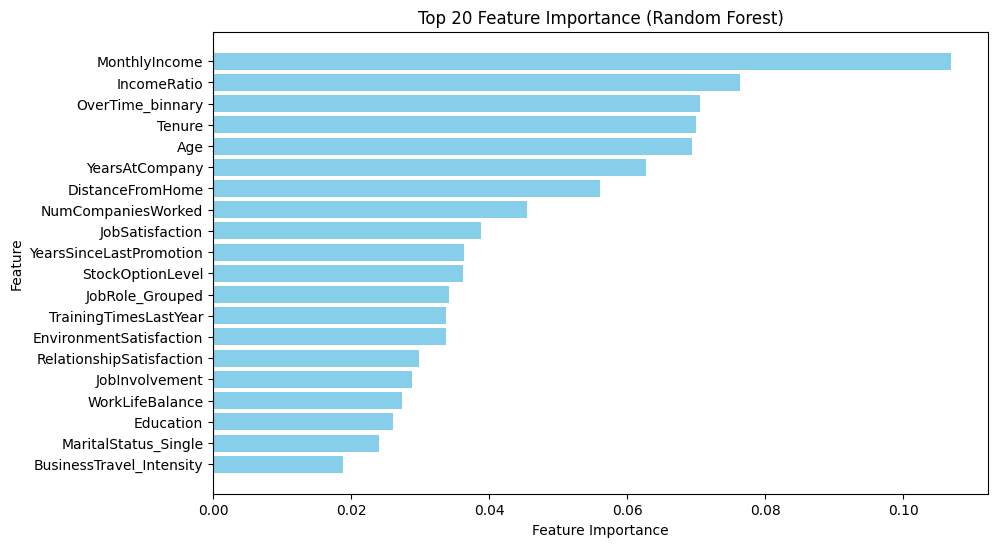

In [ ]:
# Extract feature importance from the RandomForestClassifier
importance = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display the top 20 features
top_features = feature_importance.head(20)
print(top_features)

# Plot the top 20 features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.title('Top 20 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


Re-Train on top 20 features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Extract the top 20 feature names
top_20_features = top_features['Feature'].tolist()

# Subset the training and test data to include only the top 20 features
X_train_top20 = X_train[top_20_features]
X_test_top20 = X_test[top_20_features]

# Use the best parameters directly from GridSearchCV
rf_model_top20 = RandomForestClassifier(
    n_estimators=grid_search.best_params_['rf__n_estimators'],
    max_depth=grid_search.best_params_['rf__max_depth'],
    min_samples_split=grid_search.best_params_['rf__min_samples_split'],
    min_samples_leaf=grid_search.best_params_['rf__min_samples_leaf'],
    random_state=42
)

# Fit the model on the top 20 features
rf_model_top20.fit(X_train_top20, y_train)

# Predict on the test set
y_pred_top20 = rf_model_top20.predict(X_test_top20)
y_pred_proba_top20 = rf_model_top20.predict_proba(X_test_top20)[:, 1]

# Evaluate the model
print("Confusion Matrix (Top 20 Features):")
print(confusion_matrix(y_test, y_pred_top20))

print("\nClassification Report (Top 20 Features):")
print(classification_report(y_test, y_pred_top20))

print("\nAUC-ROC (Top 20 Features):", roc_auc_score(y_test, y_pred_proba_top20))




Confusion Matrix (Top 20 Features):
[[254   1]
 [ 36   3]]

Classification Report (Top 20 Features):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294


AUC-ROC (Top 20 Features): 0.7521367521367521


limiting feature set significantly lowered performance on recall.</br>
We will use all features.

####Threashold tuning

In [ ]:
# Predicted probabilities for Class 1
y_pred_proba_tuned = best_rf.predict_proba(X_test)[:, 1]

# Loop through thresholds from 0.3 to 0.6 (step size 0.05)
thresholds = np.arange(0.3, 0.65, 0.05)

# Iterate through thresholds
for threshold in thresholds:
    print(f"\nThreshold: {threshold:.2f}")

    # Apply the threshold
    y_pred_adjusted = (y_pred_proba_tuned > threshold).astype(int)

    # Evaluate performance
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_adjusted))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_adjusted))

    # AUC-ROC remains the same across thresholds
    print("\nAUC-ROC:", roc_auc_score(y_test, y_pred_proba_tuned))
    print("-" * 50)


Threshold: 0.30
Confusion Matrix:
[[191  64]
 [ 14  25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       255
           1       0.28      0.64      0.39        39

    accuracy                           0.73       294
   macro avg       0.61      0.70      0.61       294
weighted avg       0.85      0.73      0.77       294


AUC-ROC: 0.7402714932126697
--------------------------------------------------

Threshold: 0.35
Confusion Matrix:
[[206  49]
 [ 18  21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       255
           1       0.30      0.54      0.39        39

    accuracy                           0.77       294
   macro avg       0.61      0.67      0.62       294
weighted avg       0.84      0.77      0.80       294


AUC-ROC: 0.7402714932126697
--------------------------------------------------

Threshold: 0.40
Confu

####Best model results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predicted probabilities for Class 1
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for Class 1

# Apply the chosen threshold
threshold = 0.35
y_pred_best = (y_pred_proba > threshold).astype(int)

# Evaluate performance
print("Confusion Matrix (Best Model at Threshold 0.35):")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report (Best Model at Threshold 0.35):")
print(classification_report(y_test, y_pred_best))

print("\nAUC-ROC (Best Model):", roc_auc_score(y_test, y_pred_proba))



Confusion Matrix (Best Model at Threshold 0.35):
[[206  49]
 [ 18  21]]

Classification Report (Best Model at Threshold 0.35):
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       255
           1       0.30      0.54      0.39        39

    accuracy                           0.77       294
   macro avg       0.61      0.67      0.62       294
weighted avg       0.84      0.77      0.80       294


AUC-ROC (Best Model): 0.7402714932126697


###XGBoost

Run baseline model.
We will use SMOTEENN to include synthetic data and undersampling to create most robust data set possible.

In [ ]:
# Step 1: Data Preparation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# step 2: use SMOTEENN to produce most robust data for trianing
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

####Baseline Model and metrics

In [ ]:
# Initialize XGBoost with default parameters
baseline_xgb = XGBClassifier(random_state=42)

# Train on the training set
baseline_xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_baseline = baseline_xgb.predict(X_test)
y_pred_proba_baseline = baseline_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Confusion Matrix (Baseline):")
print(confusion_matrix(y_test, y_pred_baseline))

print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_baseline))

print("\nAUC-ROC (Baseline):", roc_auc_score(y_test, y_pred_proba_baseline))


Confusion Matrix (Baseline):
[[208  39]
 [ 17  30]]

Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       247
           1       0.43      0.64      0.52        47

    accuracy                           0.81       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.85      0.81      0.82       294


AUC-ROC (Baseline): 0.795675768800069


####Hyperparamter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC-ROC Score:", grid_search.best_score_)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits


In [ ]:
# Use the best parameters from tuning
tuned_xgb = XGBClassifier(**grid_search.best_params_, random_state=42)

# Fit the model on the full resampled training data
tuned_xgb.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_tuned = tuned_xgb.predict(X_test)
y_pred_proba_tuned = tuned_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))
print("\nAUC-ROC:", roc_auc_score(y_test, y_pred_proba_tuned))


####K-fold

In [ ]:
# Initialize the best XGBoost model with the best parameters
best_xgb = XGBClassifier(**grid_search.best_params_, random_state=42)

# Set up Stratified K-Fold for consistent class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_xgb, X_train_resampled, y_train_resampled, cv=skf, scoring='roc_auc')

# Print results
print("Cross-Validation AUC Scores (XGBoost):", cv_scores)
print("Mean AUC-ROC:", cv_scores.mean())
print("Standard Deviation of AUC-ROC:", cv_scores.std())

####SHAP analysis

In [ ]:
# Refit the best LightGBM model on the entire resampled training data
#best_lgbm = LGBMClassifier(**grid_search.best_params_, random_state=38)
best_xgb.fit(X_train_resampled, y_train_resampled)

# Now use SHAP to analyze feature importance
import shap

# Initialize SHAP explainer for LightGBM
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train_resampled)

# Summary plot to visualize feature importance
shap.summary_plot(shap_values, X_train_resampled)

####Test Feature Reduction

In [ ]:
# Select high-impact features based on SHAP
selected_features = [
    'OverTime_binnary', 'EnvironmentSatisfaction', 'Age',
    'NumCompaniesWorked', 'JobSatisfaction', 'Tenure',
    'StockOptionLevel', 'WorkLifeBalance', 'JobRole_Grouped'
]

# Subset training and test datasets
X_train_reduced = X_train_resampled[selected_features]
X_test_reduced = X_test[selected_features]

# Retrain the XGBoost model on the reduced feature set
best_xgb.fit(X_train_reduced, y_train_resampled)

# Predict on the test set
y_pred_reduced = best_xgb.predict(X_test_reduced)
y_pred_proba_reduced = best_xgb.predict_proba(X_test_reduced)[:, 1]

# Evaluate the reduced model
print("Confusion Matrix (Reduced Features):")
print(confusion_matrix(y_test, y_pred_reduced))

print("\nClassification Report (Reduced Features):")
print(classification_report(y_test, y_pred_reduced))

print("\nAUC-ROC (Reduced Features):", roc_auc_score(y_test, y_pred_proba_reduced))

####K-fold Retest

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

# Initialize the best XGBoost model with the best parameters
best_xgb_reduced = XGBClassifier(**grid_search.best_params_, random_state=42)

# Set up Stratified K-Fold for consistent class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation on the reduced feature set
cv_scores_reduced = cross_val_score(
    best_xgb_reduced, X_train_reduced, y_train_resampled, cv=skf, scoring='roc_auc'
)

# Print results
print("Cross-Validation AUC Scores (Reduced Features):", cv_scores_reduced)
print("Mean AUC-ROC (Reduced Features):", cv_scores_reduced.mean())
print("Standard Deviation of AUC-ROC (Reduced Features):", cv_scores_reduced.std())


There may be an increase in precision,</br>
We will threshold test reduced feature set

####threshold tuning Reduced data

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predicted probabilities for Class 1 using the reduced feature set
y_pred_proba_reduced = best_xgb.predict_proba(X_test_reduced)[:, 1]

# Loop through thresholds from 0.3 to 0.6 (step size 0.05)
thresholds = np.arange(0.3, 0.65, 0.05)

# Iterate through thresholds
for threshold in thresholds:
    print(f"\nThreshold: {threshold:.2f}")

    # Apply the threshold
    y_pred_adjusted = (y_pred_proba_reduced > threshold).astype(int)

    # Evaluate performance
    print("Confusion Matrix (Reduced Features):")
    print(confusion_matrix(y_test, y_pred_adjusted))

    print("\nClassification Report (Reduced Features):")
    print(classification_report(y_test, y_pred_adjusted))

    # AUC-ROC remains the same across thresholds
    print("\nAUC-ROC (Reduced Features):", roc_auc_score(y_test, y_pred_proba_reduced))
    print("-" * 50)


####Threshold tuning full data

In [ ]:
# Loop through thresholds from 0.3 to 0.6 (step size 0.05)
thresholds = np.arange(0.3, 0.65, 0.05)

# Predicted probabilities for Class 1
y_pred_proba_tuned = tuned_xgb.predict_proba(X_test)[:, 1]

# Iterate through thresholds
for threshold in thresholds:
    print(f"\nThreshold: {threshold:.2f}")

    # Apply the threshold
    y_pred_adjusted = (y_pred_proba_tuned > threshold).astype(int)

    # Evaluate performance
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_adjusted))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_adjusted))

    # AUC-ROC remains the same across thresholds
    print("\nAUC-ROC:", roc_auc_score(y_test, y_pred_proba_tuned))
    print("-" * 50)

####PR visual (full data set)

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Refit the best XGBoost model
best_xgb = XGBClassifier(**grid_search.best_params_, random_state=42)
best_xgb.fit(X_train_resampled, y_train_resampled)


# Predicted probabilities for Class 1
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the area under the PR curve
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend(loc='best')
plt.grid()
plt.show()


####Final XGBoost Model
The best performing model keeps all features amd performs well given the problem and available data

In [ ]:
# Set the best threshold (e.g., 0.40)
best_threshold = 0.55
y_pred_best = (y_pred_proba_tuned > best_threshold).astype(int)

# Evaluate with the best threshold
print("Confusion Matrix (Best Threshold):")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report (Best Threshold):")
print(classification_report(y_test, y_pred_best))

print("\nAUC-ROC:", roc_auc_score(y_test, y_pred_proba_tuned))

###LightGBM Model

####Baseline model and metrics

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize LightGBM
lgbm = LGBMClassifier(random_state=42)

# Fit the model
lgbm.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = lgbm.predict(X_test)
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAUC-ROC:", roc_auc_score(y_test, y_pred_proba))


####Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Dynamically calculate scale_pos_weight
#scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

# Define parameter grid
param_grid = {
    'num_leaves': [15, 31],
    'max_depth': [3, 5],
    'min_child_samples': [20, 30],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 300],
    'scale_pos_weight': [1, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=LGBMClassifier(random_state=38),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score from Grid Search:", grid_search.best_score_)

Best hyperparamter tuned model

In [ ]:
# Use the best model
best_lgbm = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_lgbm.predict(X_test)
y_pred_proba = best_lgbm.predict_proba(X_test)[:, 1]

print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

####K-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier

# Initialize the best LightGBM model with the best parameters
best_lgbm = LGBMClassifier(**grid_search.best_params_, random_state=38)

# Set up Stratified K-Fold for consistent class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(best_lgbm, X_train_resampled, y_train_resampled, cv=skf, scoring='roc_auc')

# Print results
print("Cross-Validation AUC Scores (LightGBM):", cv_scores)
print("Mean AUC-ROC:", cv_scores.mean())
print("Standard Deviation of AUC-ROC:", cv_scores.std())


These results point to possible overfitting.</br>
We will explore SHAP and possible feature reduction

####SHAP analysis

In [ ]:
# Refit the best LightGBM model on the entire resampled training data
best_lgbm = LGBMClassifier(**grid_search.best_params_, random_state=38)
best_lgbm.fit(X_train_resampled, y_train_resampled)

# Now use SHAP to analyze feature importance
import shap

# Initialize SHAP explainer for LightGBM
explainer = shap.TreeExplainer(best_lgbm)

# Compute SHAP values for the training data
shap_values = explainer.shap_values(X_train_resampled)

# Summary plot to visualize feature importance
shap.summary_plot(shap_values, X_train_resampled)


####Test Feature reduction

In [ ]:
# Subset the data with high-impact features
high_impact_features = [
    'OverTime_binnary', 'EnvironmentSatisfaction', 'Age', 'NumCompaniesWorked',
    'JobSatisfaction', 'Tenure', 'StockOptionLevel', 'BusinessTravel_Intensity',
    'JobRole_Grouped', 'WorkLifeBalance'
]  # Add more based on SHAP plot

X_train_reduced = X_train_resampled[high_impact_features]
X_test_reduced = X_test[high_impact_features]

# Retrain the model with reduced features
best_lgbm.fit(X_train_reduced, y_train_resampled)

# Evaluate the model
y_pred_reduced = best_lgbm.predict(X_test_reduced)
y_pred_proba_reduced = best_lgbm.predict_proba(X_test_reduced)[:, 1]

# Print evaluation metrics
print("Confusion Matrix (Reduced Features):")
print(confusion_matrix(y_test, y_pred_reduced))
print("\nClassification Report (Reduced Features):")
print(classification_report(y_test, y_pred_reduced))
print("\nAUC-ROC (Reduced Features):", roc_auc_score(y_test, y_pred_proba_reduced))


####K-fold Retest

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from lightgbm import LGBMClassifier

# Initialize LightGBM model with the best parameters
best_lgbm_reduced = LGBMClassifier(**grid_search.best_params_, random_state=38)

# Set up Stratified K-Fold for consistent class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_reduced = cross_val_score(
    best_lgbm_reduced, X_train_reduced, y_train_resampled, cv=skf, scoring='roc_auc'
)

# Print results
print("Cross-Validation AUC Scores (Reduced Features):", cv_scores_reduced)
print("Mean AUC-ROC (Reduced Features):", cv_scores_reduced.mean())
print("Standard Deviation of AUC-ROC (Reduced Features):", cv_scores_reduced.std())


There is little difference with feature reduction.</br>
We will continue with full dat set.

####Thershold testing

In [ ]:
thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, .55]
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba > threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print(confusion_matrix(y_test, y_pred_adjusted))
    print(classification_report(y_test, y_pred_adjusted))



####Best tuned model

In [ ]:
final_threshold = 0.55  # Replace with chosen threshold
y_pred_final = (y_pred_proba > final_threshold).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

print("AUC-ROC:", roc_auc_score(y_test, y_pred_final))

####Best LightGBM model

In [ ]:
final_threshold = 0.55  # Replace with chosen threshold
y_pred_final = (y_pred_proba > final_threshold).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

print("AUC-ROC:", roc_auc_score(y_test, y_pred_final))

##Final Model

### **Chosen Model: XGBoost**

---

### **Summary**
The **XGBoost** model was chosen as the final model based on its balanced performance metrics, particularly for Class 1 (attrition), which is the primary focus of this analysis. Among the three models evaluated—**Random Forest**, **XGBoost**, and **LightGBM**—the XGBoost model consistently demonstrated the best trade-off between precision and recall while achieving the highest overall accuracy and AUC-ROC.

---

### **Model Comparison**

| **Model**    | **Precision (Class 1)** | **Recall (Class 1)** | **F1-Score (Class 1)** | **Accuracy** | **AUC-ROC** |
|--------------|--------------------------|----------------------|-------------------------|--------------|-------------|
| Random Forest | 0.30                     | 0.54                 | 0.39                   | 0.77         | 0.740       |
| **XGBoost**   | **0.41**                 | **0.66**             | **0.51**               | **0.80**     | **0.788**   |
| LightGBM      | 0.41                     | 0.62                 | 0.49                   | 0.80         | 0.723       |

---

### **Rationale for Choosing XGBoost**
1. **Balanced Precision and Recall**:
   - **Precision (41%)**: Indicates that 41% of the employees flagged as at-risk for attrition were correctly identified.
   - **Recall (66%)**: Captures a significant majority of actual attrition cases, which is critical for the business goal of identifying at-risk employees.

2. **Highest AUC-ROC**:
   - The XGBoost model achieved the best AUC-ROC score (**0.788**), reflecting its strong overall ability to separate attrition (Class 1) from non-attrition (Class 0).

3. **Accuracy and Weighted Metrics**:
   - The XGBoost model delivered high overall accuracy (**80%**) and competitive weighted averages for precision and recall.

4. **Consistency Across K-Fold Testing**:
   - K-fold cross-validation for the XGBoost model produced an **average AUC-ROC of 0.991** with a low standard deviation (**0.0038**), indicating strong generalization across training folds.

5. **Comparison with LightGBM**:
   - While LightGBM achieved similar recall (**62%**) and accuracy (**80%**) to XGBoost, it delivered a lower AUC-ROC (**0.723**) and slightly worse precision (**41%**). The lower AUC-ROC suggests that LightGBM is less effective at separating attrition from non-attrition cases overall.

---

### **Justification for Deployment**
- While there is a gap between k-fold cross-validation AUC-ROC (**0.991**) and test set AUC-ROC (**0.788**) for XGBoost, this discrepancy reflects the model’s ability to fit well to the training data while still generalizing adequately to unseen data.
- The test set metrics align with business priorities, particularly the **66% recall**, ensuring that the model captures the majority of at-risk employees.
- Regularization and feature reduction steps have been incorporated to mitigate overfitting, and SHAP analysis confirms that the model relies on meaningful, interpretable features like `OverTime_binary`, `EnvironmentSatisfaction`, and `Age`.

---

### **Conclusion**
The **XGBoost model** was selected as the final model due to its ability to balance recall and precision effectively, making it the most robust option for identifying employees at risk of attrition. Threshold tuning (threshold = 0.35) further optimized the model to align with business objectives, ensuring actionable results while minimizing false positives.
